In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shapefile as sh
import geopandas as gpd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import sklearn.linear_model as lm
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from scipy import stats


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import pickle

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_excel('house_data.xlsx')
print(df.head(3))
print(df.info())

           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  

[3 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
R

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
print(df.isna().count())
print(df.isnull())
print(df.nunique())

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64
          id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...

In [5]:
print(df.dtypes)

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [6]:
df[['lat','long']]

,lat,long
0,47.51,-122.26
1,47.72,-122.32
2,47.74,-122.23
3,47.52,-122.39
4,47.62,-122.05
...,...,...
21608,47.70,-122.35
21609,47.51,-122.36
21610,47.59,-122.30
21611,47.53,-122.07


<Axes: >

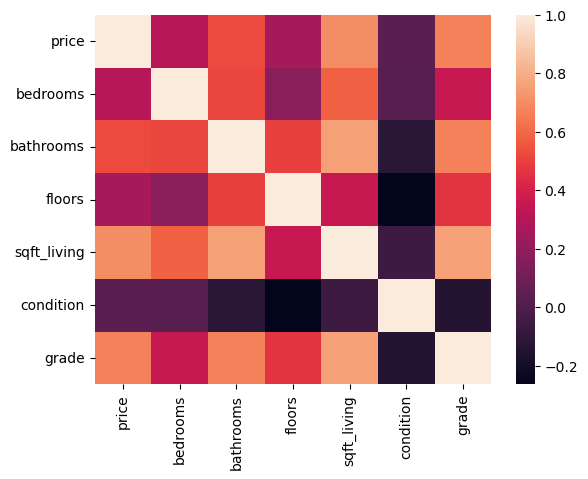

In [7]:
ndata = pd.DataFrame(df[['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'condition', 'grade']])
hm = ndata.corr()
sns.heatmap(hm)

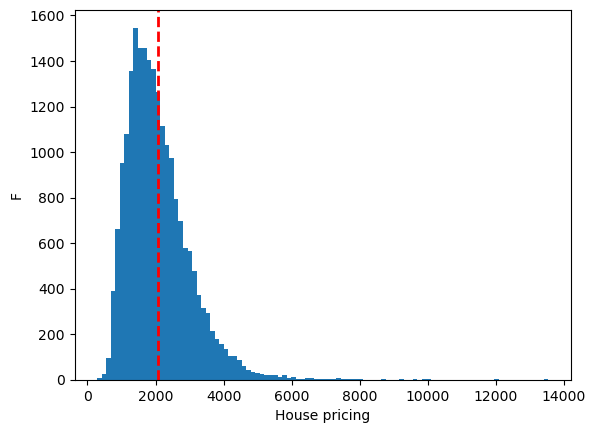

In [8]:
#Revisando outlayers 

p = ndata['sqft_living']
mid = np.mean(p)
plt.hist(p, bins=100)
plt.axvline(x=mid, color= 'red', linestyle = 'dashed', linewidth = 2, label= 'Media')
plt.xlabel('House pricing')
plt.ylabel('F')
plt.show()

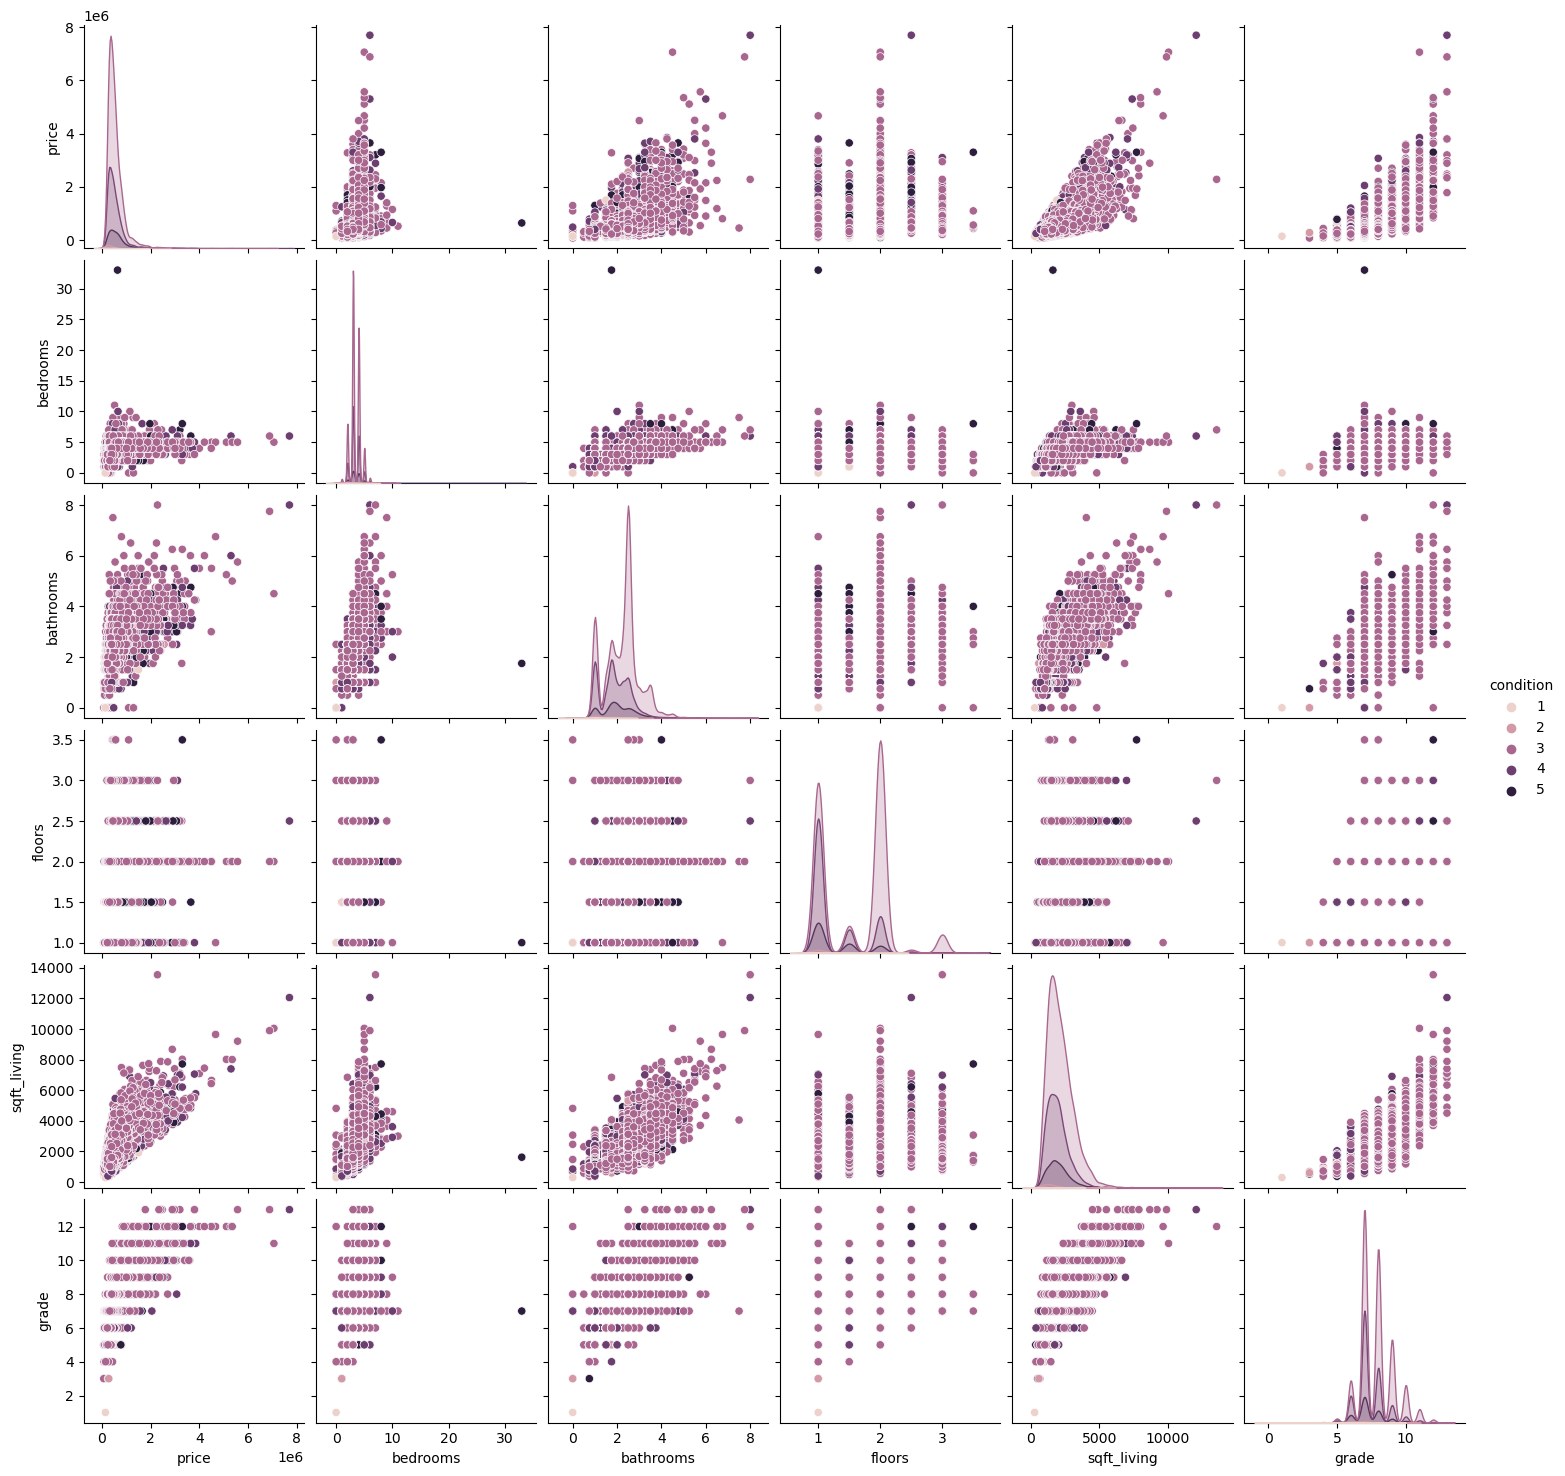

In [9]:
sns.pairplot(ndata, hue='condition')

In [10]:

mdata = df[['price', 'lat', 'long']]
mdata

,price,lat,long
0,221900,47.51,-122.26
1,538000,47.72,-122.32
2,180000,47.74,-122.23
3,604000,47.52,-122.39
4,510000,47.62,-122.05
...,...,...,...
21608,360000,47.70,-122.35
21609,400000,47.51,-122.36
21610,402101,47.59,-122.30
21611,400000,47.53,-122.07


In [11]:
#Using geopandas we create a geodataframe with latitud and longitude
gdf = gpd.GeoDataFrame(mdata, geometry=gpd.points_from_xy(mdata['lat'], mdata['long']))
gdf

,price,lat,long,geometry
0,221900,47.51,-122.26,POINT (47.511 -122.257)
1,538000,47.72,-122.32,POINT (47.721 -122.319)
2,180000,47.74,-122.23,POINT (47.738 -122.233)
3,604000,47.52,-122.39,POINT (47.521 -122.393)
4,510000,47.62,-122.05,POINT (47.617 -122.045)
...,...,...,...,...
21608,360000,47.70,-122.35,POINT (47.699 -122.346)
21609,400000,47.51,-122.36,POINT (47.511 -122.362)
21610,402101,47.59,-122.30,POINT (47.594 -122.299)
21611,400000,47.53,-122.07,POINT (47.535 -122.069)


<Axes: >

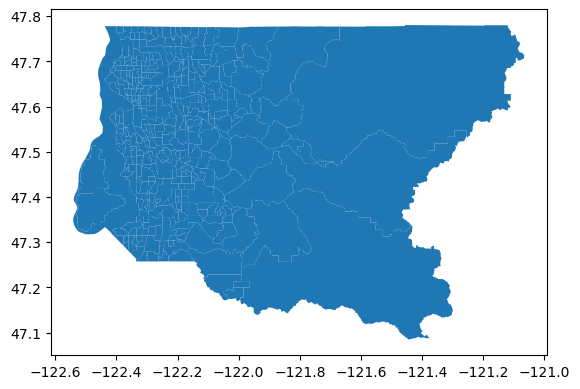

In [12]:
#Download the SHP file from the source
# https://data.kingcounty.gov/browse?category=Property+%26+Assessments
kings_county_map = gpd.read_file('ACS%3A_Median_Value_(Dollars)___acs_b25077_medianvalue.shp')
kings_county_map.plot()

<Axes: >

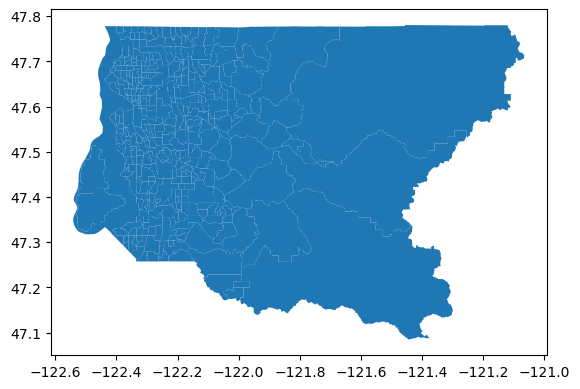

In [13]:
kings_county_map.to_crs(epsg=4326).plot()

In [14]:
#with shapely we give it form and using a for loop we iterate fo create or geo dataframe
from shapely.geometry import Point, Polygon
crs = {'init' : 'EPSG:4326'}
geometry = [Point(xy) for xy in zip(gdf['long'], gdf['lat'])]
geo_df = gpd.GeoDataFrame(gdf,
                          crs=crs,
                          geometry= geometry)

geo_df.head(2)

,price,lat,long,geometry
0,221900,47.51,-122.26,POINT (-122.25700 47.51120)
1,538000,47.72,-122.32,POINT (-122.31900 47.72100)


Text(0.5, 1.0, 'King County Real State')

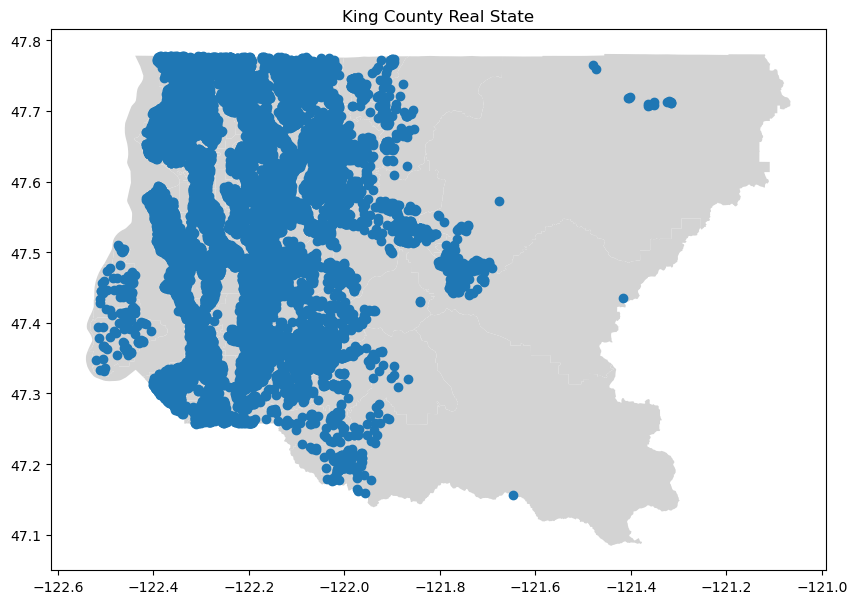

In [15]:
#plotting the gdf
fig, ax = plt.subplots(figsize=(10,10))
kings_county_map.to_crs(epsg=4326).plot(ax= ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('King County Real State')

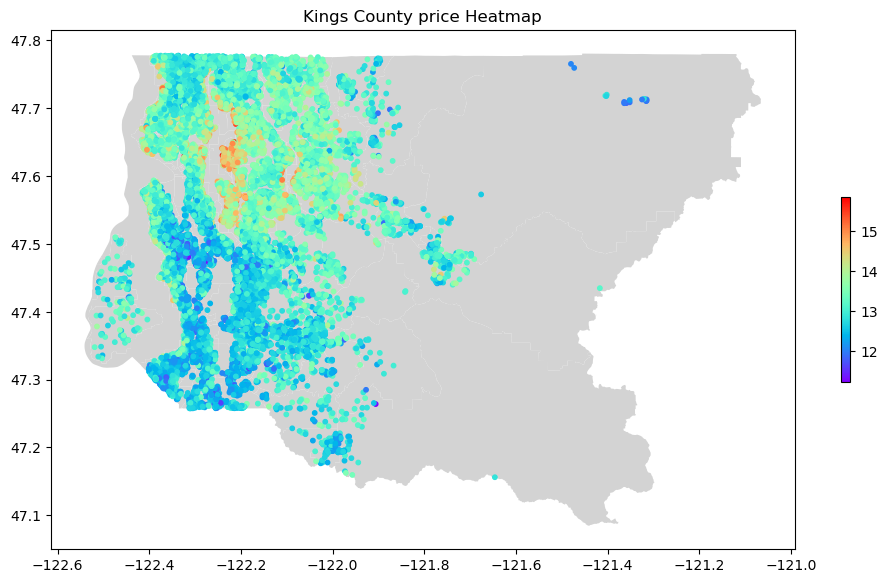

In [16]:
#Now we create a heatmap of the house pricing
geo_df['price_log'] = np.log(geo_df['price'])
fig, ax = plt.subplots(figsize= (12,8))
kings_county_map.to_crs(epsg=4326).plot(ax=ax, color="lightgrey")
geo_df.plot(column= 'price_log', ax= ax, cmap= 'rainbow', legend=True, legend_kwds = {'shrink': 0.3},
            markersize = 10)
ax.set_title("Kings County price Heatmap")
plt.savefig('Heat Map')

In [17]:

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
df = df.drop(columns='date')

<Axes: >

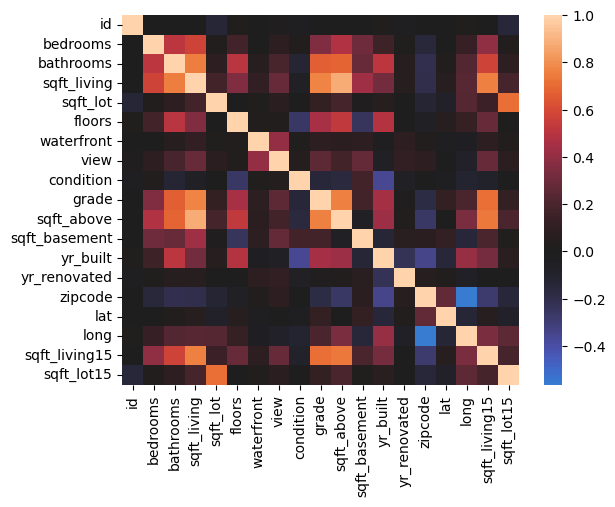

In [19]:
features = df.drop('price', axis=1)
sns.heatmap(features.corr(), center=0)

In [20]:
abs(features.corr()) > 0.8

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


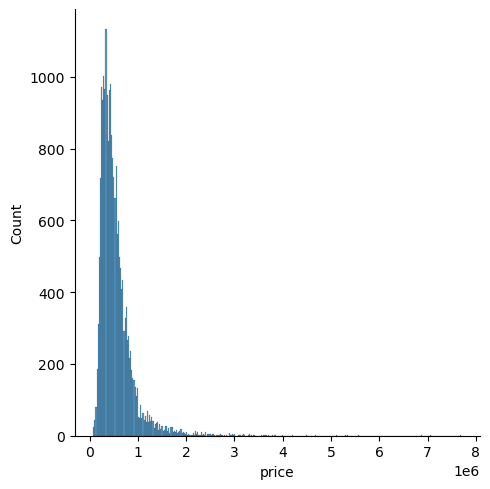

In [21]:
#Before normalize
sns.displot(df.price);

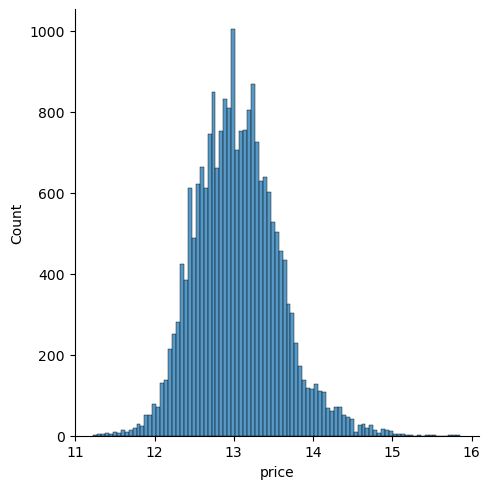

In [22]:
#Normalized with target price
df.price = np.log(df.price)
sns.displot(df.price)

In [28]:

df = df.drop('sqft_lot', axis=1)

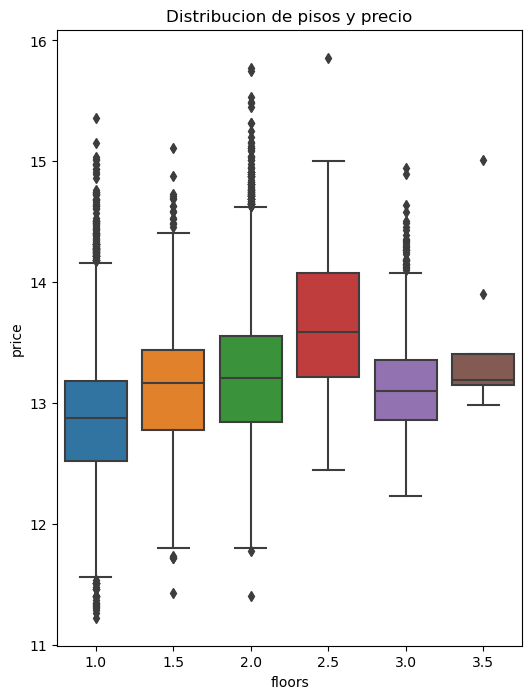

In [31]:
#Boxplot so we can look for outliers
plt.figure(figsize=(6,8))
sns.boxplot(x=df['floors'], y=df['price'])
plt.title("Distribucion de pisos y precio")
plt.show();

In [32]:
#We use a value larger than 3 following the sigma's 3 rule, that can be fitted to the 3% of data.
df = df[(np.abs(stats.zscore(df.price)) < 3)]

In [34]:
X = df.drop('price', axis=1)
y= df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Models dictionary
def find_model(X, y):
    lasso_params = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
    ridge_params = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
    elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
                      'l1_ratio':[0.1,0.3,0.5,0.7,0.9]}
    tree_params = {'max_depth':[None, 10, 20 ,30],
                   'min_samples_split':[2,5,10],
                   'min_samples_leaf': [1,2,4]}
    #Defining models
    lasso = Lasso()
    ridge = Ridge()
    elastic = ElasticNet()
    tree = DecisionTreeRegressor()
    
    models = [lasso, ridge, elastic, tree]
    params = [lasso_params, ridge_params, elastic_params]
    best_model = None
    best_params = None
    best_score = float('-inf')
    
    models_save = []
    
    for model, param_grid in zip(models, params):
        grid_search = GridSearchCV(model, param_grid, cv= 4, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        
        if grid_search.best_score_>best_score:
            best_score = grid_search.best_score_
            best_model = model
            best_params = grid_search.best_params_
        print("Best Model: ", grid_search.best_estimator_)
        print("Best Params: ", grid_search.best_params_)
        print("Adjustment: ", -grid_search.best_score_)
        models_save.append(grid_search.best_estimator_)
    return best_model, best_params, models_save

In [50]:
best_model, best_params, models = find_model(X_train, y_train)
print(f"The best model: {best_model}")
print(f"The best hyperparams: {best_params}")

Best Model:  Lasso(alpha=0.001)
Best Params:  {'alpha': 0.001}
Adjustment:  0.06265727648762787
Best Model:  Ridge(alpha=0.1)
Best Params:  {'alpha': 0.1}
Adjustment:  0.062309103292647404
Best Model:  ElasticNet(alpha=0.001, l1_ratio=0.1)
Best Params:  {'alpha': 0.001, 'l1_ratio': 0.1}
Adjustment:  0.06243361959514265
The best model: Ridge()
The best hyperparams: {'alpha': 0.1}


In [51]:
#Regression Tree
#First split the data into train and test 
X = df.drop('price', axis=1)
y= df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

Mean Squared Error: 0.11773174414115141


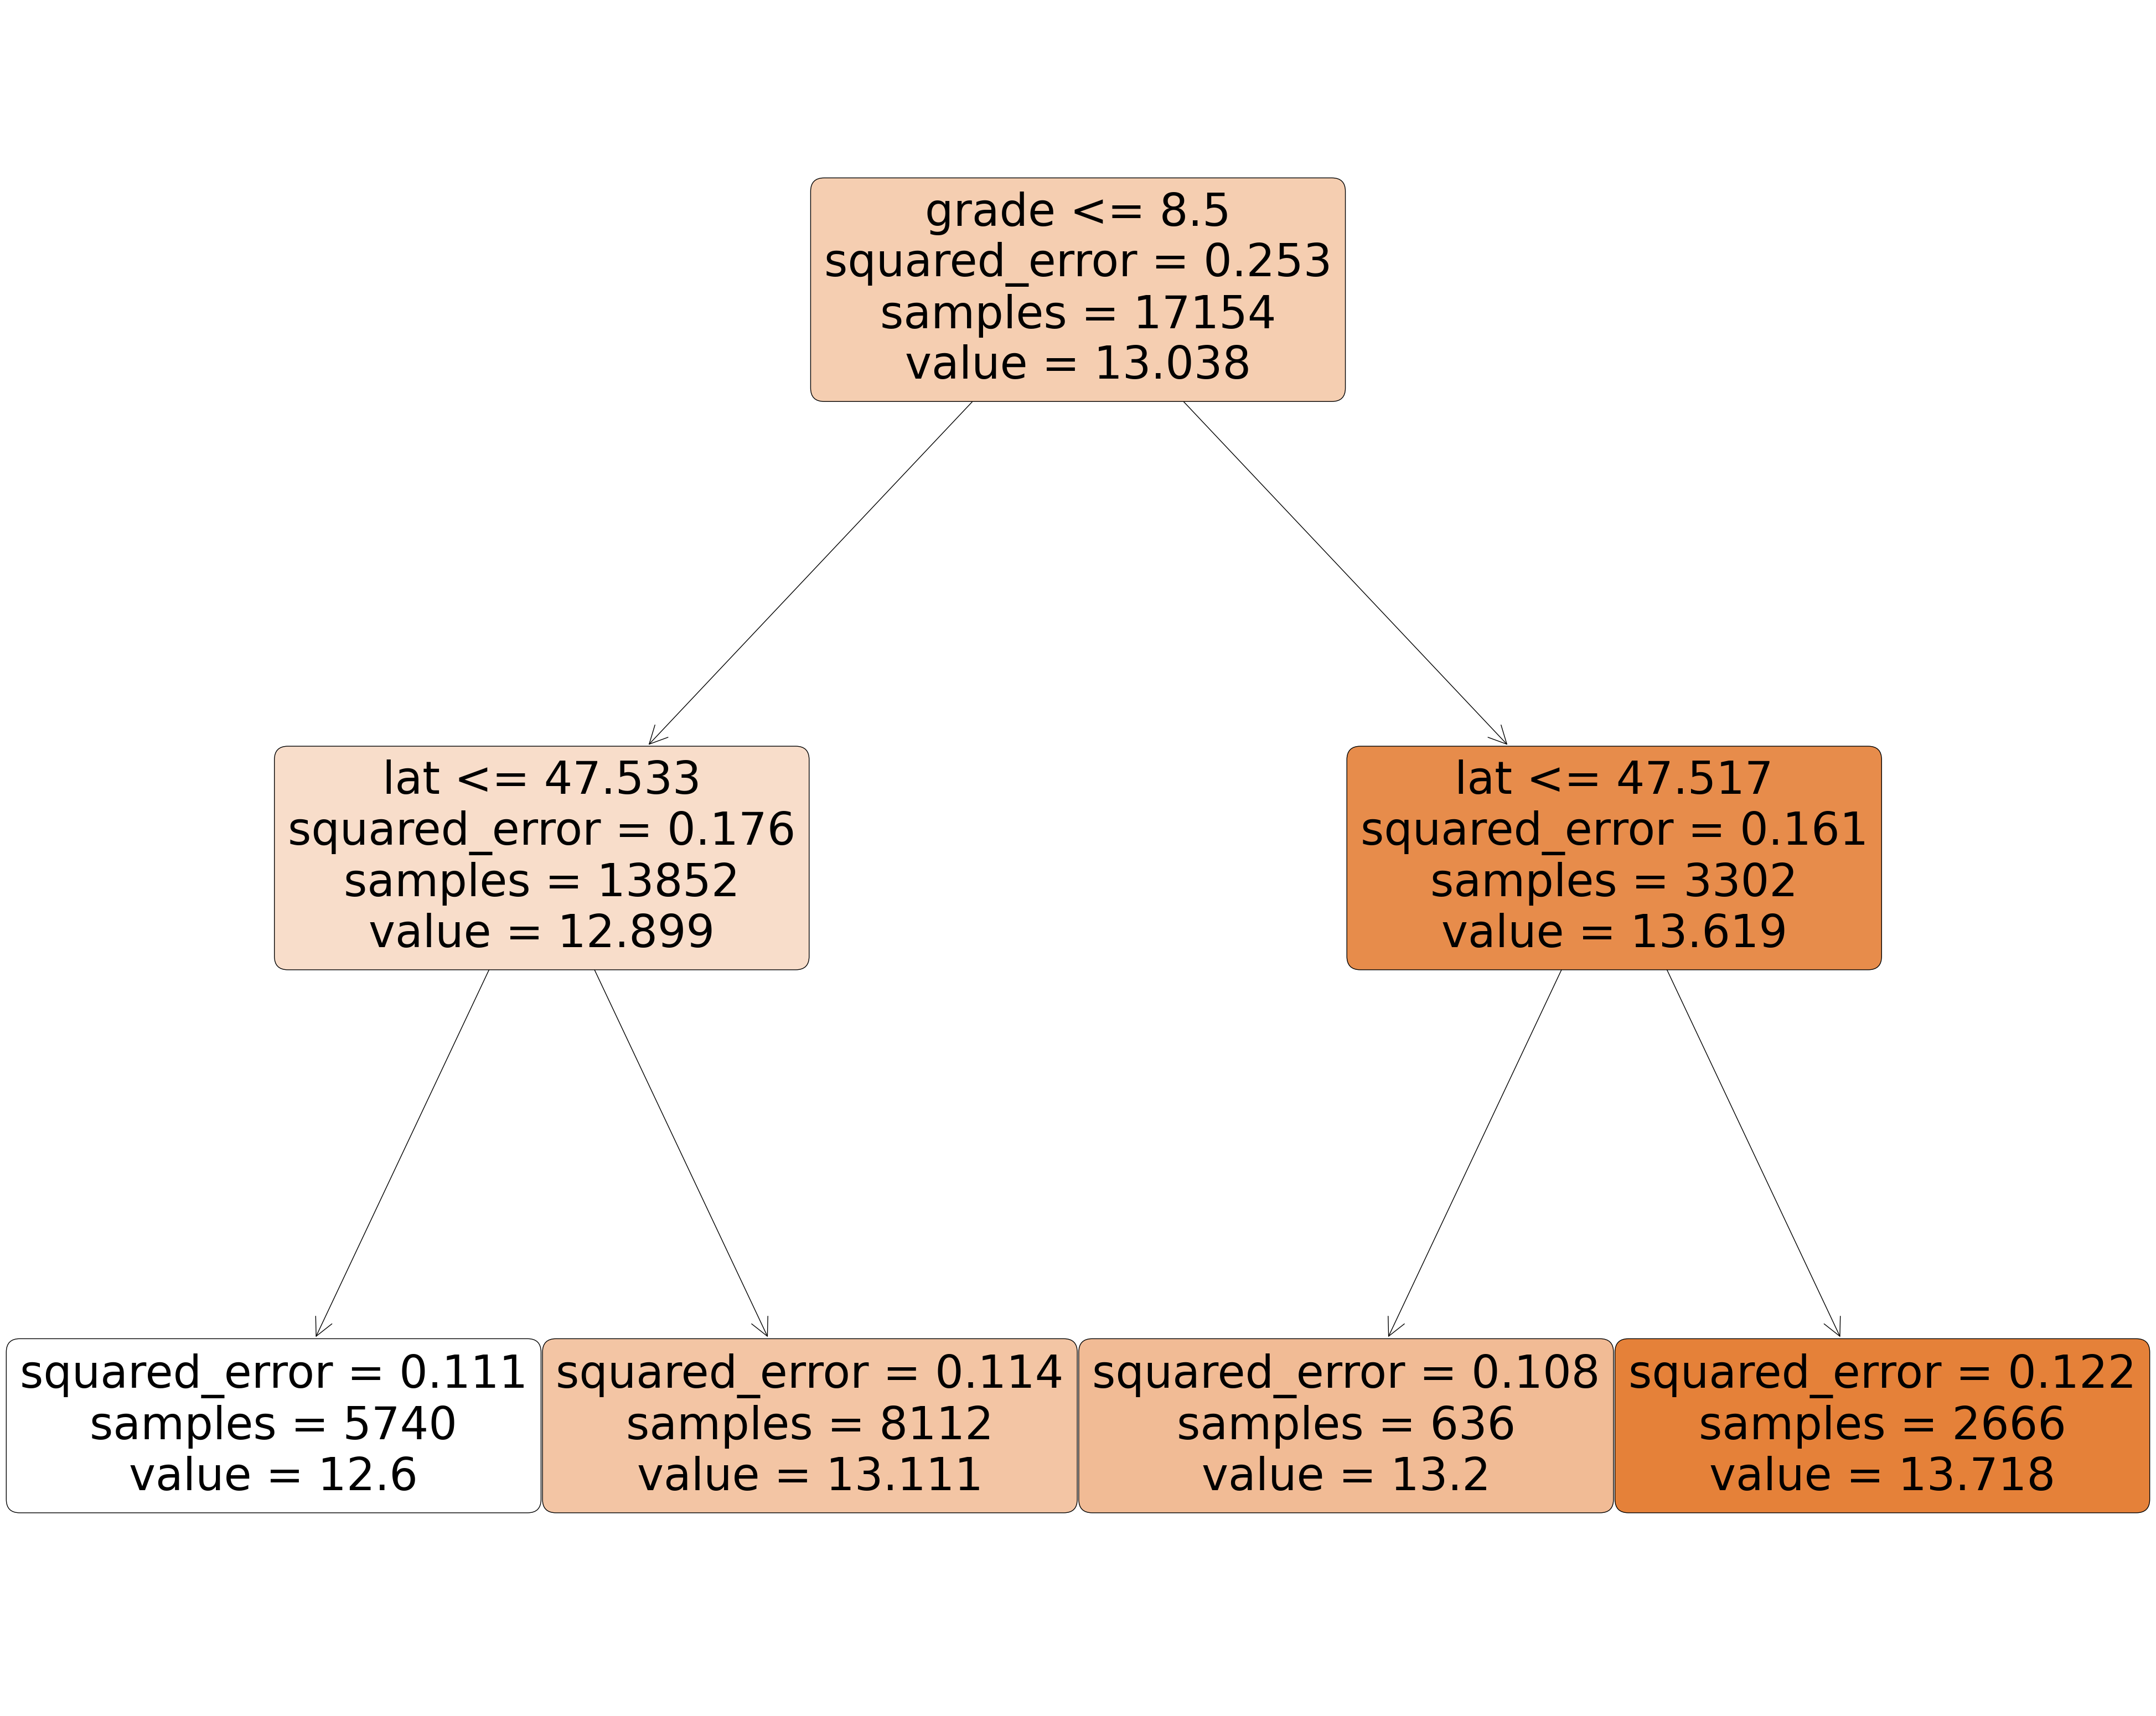

In [63]:
#Building the desicion tree
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plt.figure(figsize=(50,40))
feature_names = X.columns.tolist()
plot_tree(reg_tree, feature_names= feature_names,filled=True, rounded=True)
plt.show()

5. Utilizar métricas de evaluación de regresión, como el Error Cuadrático Medio (MSE),
el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²), para medir el
rendimiento del modelo y concluir sobre ellos.

In [64]:
#Function to evaluate the model
def model_eval(model, X_test, y_test, name):
    y_predict = model.predict(X_test)
    print("R2: ", r2_score(y_predict, y_test))
    print("RMSE: ", mean_squared_error(y_predict, y_test))
    print("MAPE: ", mean_absolute_percentage_error(y_predict, y_test))
    

In [65]:
#Model list
names = ['lasso','ridge','elastic_net','reg_tree']
for n, m in zip(names, models):
    print(n)
    model_eval(m, X_test, y_test, n)
    print('-'*100)

lasso
R2:  0.6626146122181433
RMSE:  0.06260256727302914
MAPE:  0.014858239311625922
----------------------------------------------------------------------------------------------------
ridge
R2:  0.6721271501512561
RMSE:  0.06224261697776005
MAPE:  0.014843097232849402
----------------------------------------------------------------------------------------------------
elastic_net
R2:  0.6646408242530215
RMSE:  0.062350267378329355
MAPE:  0.014859905149638414
----------------------------------------------------------------------------------------------------


1. the average variability of the objective variable was 66%
2. the RMSE of 0.06 sugests that the average predictions of the house prices is 0.062 from the actual value.
3. The MAPE shows that the model predictions are 1.49% off in average, which can be accepted